# IMPORTING LIBRARIES

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [136]:
warnings.filterwarnings('ignore')
df = pd.read_csv('/Users/sahil_jangid/codes/machine learning/PCA_heart disease/heart.csv')
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [138]:
df.duplicated().any()

np.False_

In [139]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# TREATING OUTLIERS

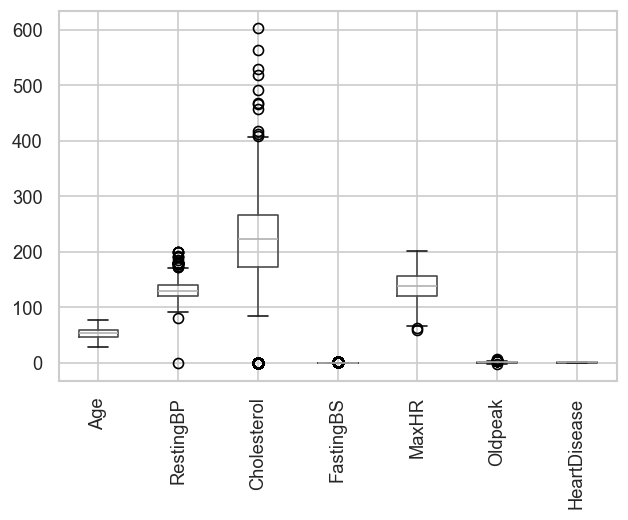

In [140]:
plt.figure(figsize=(6,4) , dpi=120)
df.boxplot()
plt.xticks(rotation=90)
plt.show()

In [141]:
df_clean = df.copy()

for col in df.select_dtypes(include=[np.number]).columns:
    z = np.abs(stats.zscore(df_clean[col]))
    df_clean = df_clean[z < 3]

In [142]:
df_clean

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


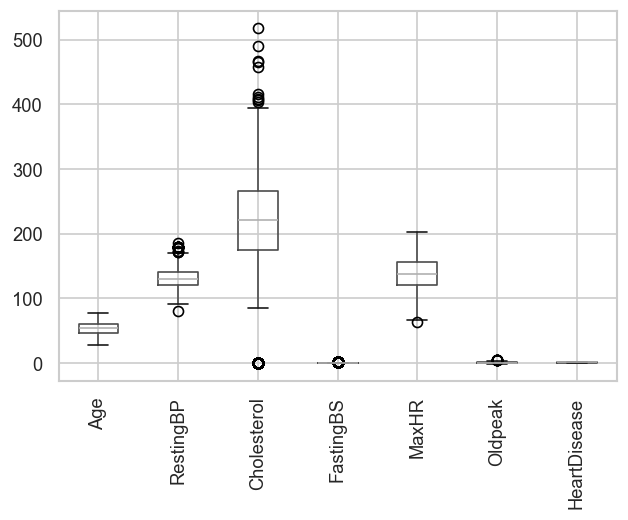

In [143]:
plt.figure(figsize=(6,4) , dpi=120)
df_clean.boxplot()
plt.xticks(rotation=90)
plt.show()

# CATAGORICAL COLUMN ENCODINGS

In [144]:
df_clean.shape

(899, 12)

In [145]:
df_clean.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [146]:
catagorical_columns = df[['Sex' , 'ChestPainType' , 'RestingECG' , 'ExerciseAngina' , 'ST_Slope' ]]

In [147]:
for col in catagorical_columns:
    print(col , df[col].unique())

Sex ['M' 'F']
ChestPainType ['ATA' 'NAP' 'ASY' 'TA']
RestingECG ['Normal' 'ST' 'LVH']
ExerciseAngina ['N' 'Y']
ST_Slope ['Up' 'Flat' 'Down']


In [148]:
df_clean.ExerciseAngina.replace(
    {
        'N':0,
        'Y':1
    }
,inplace=True)

df_clean.RestingECG.replace(
    {
        'Normal':1,
        'ST':2, 
        'LVH':3
    }
,inplace=True)

df_clean.ST_Slope.replace(
    {
        'Down':1,
        'Flat':2,
        'Up':3
    }
,inplace = True)

In [149]:
df_clean

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,1,132,0,1.2,2,1
914,68,M,ASY,144,193,1,1,141,0,3.4,2,1
915,57,M,ASY,130,131,0,1,115,1,1.2,2,1
916,57,F,ATA,130,236,0,3,174,0,0.0,2,1


In [150]:
df_transformed = pd.get_dummies(df_clean , drop_first=True).astype(int)

In [151]:
df_transformed

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0,3,0,1,1,0,0
1,49,160,180,0,1,156,0,1,2,1,0,0,1,0
2,37,130,283,0,2,98,0,0,3,0,1,1,0,0
3,48,138,214,0,1,108,1,1,2,1,0,0,0,0
4,54,150,195,0,1,122,0,0,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,1,132,0,1,2,1,1,0,0,1
914,68,144,193,1,1,141,0,3,2,1,1,0,0,0
915,57,130,131,0,1,115,1,1,2,1,1,0,0,0
916,57,130,236,0,3,174,0,0,2,1,0,1,0,0


In [152]:
df_transformed.shape

(899, 14)

# TRAIN TEST SPLITING , SCALING 

In [153]:
x = df_transformed.drop(columns='HeartDisease' , axis=1)
y = df_transformed.HeartDisease

In [154]:
x.shape,y.shape

((899, 13), (899,))

In [155]:
scaler = StandardScaler()

x_Scaled = scaler.fit_transform(x)
x_Scaled

array([[-1.42815446,  0.46590022,  0.84963584, ...,  2.06332497,
        -0.5349047 , -0.22955001],
       [-0.47585532,  1.63471366, -0.16812204, ..., -0.48465463,
         1.86949191, -0.22955001],
       [-1.7455875 , -0.1185065 ,  0.79361247, ...,  2.06332497,
        -0.5349047 , -0.22955001],
       ...,
       [ 0.3706328 , -0.1185065 , -0.62564622, ..., -0.48465463,
        -0.5349047 , -0.22955001],
       [ 0.3706328 , -0.1185065 ,  0.35476274, ...,  2.06332497,
        -0.5349047 , -0.22955001],
       [-1.63977649,  0.34901888, -0.21480818, ..., -0.48465463,
         1.86949191, -0.22955001]])

In [156]:
x_train , x_test , y_train , y_test = train_test_split(x_Scaled , y , test_size=0.2 , random_state=30)

In [157]:
x_train.shape , x_test.shape   

((719, 13), (180, 13))

In [158]:
y_train.shape , y_test.shape

((719,), (180,))

# MODEL TRANING

In [163]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)
model_rf.score(x_test, y_test)

0.8555555555555555

In [168]:
model_log = LogisticRegression()
model_log.fit(x_train, y_train)
model_log.score(x_test,y_test)

0.8555555555555555

# PCA

In [196]:
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x_Scaled)

In [197]:
pca.explained_variance_ratio_

array([0.2202428 , 0.10879211, 0.09918967, 0.0915049 , 0.08218022])

In [198]:
x_train_pca , x_test_pca , y_train_pca , y_test_pca = train_test_split(x_pca , y, test_size=0.2, random_state=30)

In [200]:
print(pca.n_components_ , pca.explained_variance_ratio_)

5 [0.2202428  0.10879211 0.09918967 0.0915049  0.08218022]


In [199]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train_pca, y_train_pca)
model_rf.score(x_test_pca, y_test_pca)

0.85